In [2]:
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
import pandas as pd
import seaborn as sns

In [3]:
black_cent = pd.read_pickle("results_data/blackjax_cent.pkl")
black_non_cent = pd.read_pickle("results_data/blackjax_non_cent.pkl")
pystan_cent = pd.read_pickle("results_data/pymc_cent.pkl")
pystan_non_cent = pd.read_pickle("results_data/pymc_non_cent.pkl")

pystan_non_cent

,chain,draw,warmup,mu,logtau,theta_prime[1],theta_prime[2],theta_prime[3],theta_prime[4],theta_prime[5],...,divergent__,energy__,theta[1],theta[2],theta[3],theta[4],theta[5],theta[6],theta[7],theta[8]
0,0,0,0,6.547992,2.665117,-0.569524,-0.177498,-0.310216,0.298768,-0.477434,...,0,13.675695,-1.635855,3.997412,2.090308,10.841181,-0.312560,-18.729364,15.221723,17.594987
1,0,1,0,3.004298,2.396597,-0.783524,-0.262493,-0.557419,0.254404,0.007083,...,0,15.005492,-5.603292,0.120623,-3.119361,5.799107,3.082108,-17.494041,8.748049,10.519741
2,0,2,0,-0.194647,2.247775,1.885068,0.035816,0.177853,-0.566742,-0.894739,...,0,15.091184,17.650637,0.144409,1.489026,-5.559793,-8.664827,9.437025,4.978968,-5.015763
3,0,3,0,7.252711,1.102637,-0.788020,0.448272,-1.198964,1.619066,0.498733,...,0,19.081941,4.879118,8.602949,3.641313,12.129496,8.754944,2.309464,4.314342,10.195681
4,0,4,0,12.386971,2.102837,2.109539,-0.060576,-1.265540,0.909937,-0.917573,...,0,22.282023,29.662771,11.890894,2.022994,19.838787,4.872627,25.494354,10.773718,13.631313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7,995,0,5.537976,1.992814,0.140761,-0.530215,0.413935,-0.517715,0.569388,...,0,10.378140,6.570619,1.648239,8.574668,1.739943,9.715095,2.538744,8.654425,2.649024
7996,7,996,0,8.425103,2.309077,0.833363,0.362584,-0.133427,-0.780587,0.108922,...,0,13.612948,16.813010,12.074558,7.082148,0.568390,9.521413,8.256939,4.760740,16.553897
7997,7,997,0,5.970969,2.875064,0.259968,-0.109580,-0.335398,0.527610,-0.799931,...,0,10.471301,10.579309,4.028497,0.025512,15.323668,-8.209057,-1.010109,31.744319,-2.034680
7998,7,998,0,4.562103,1.997577,1.711122,0.928748,0.009907,-0.244922,0.310011,...,0,13.349291,17.175076,11.408065,4.635128,2.756742,6.847249,9.385796,1.873962,10.342855


[]

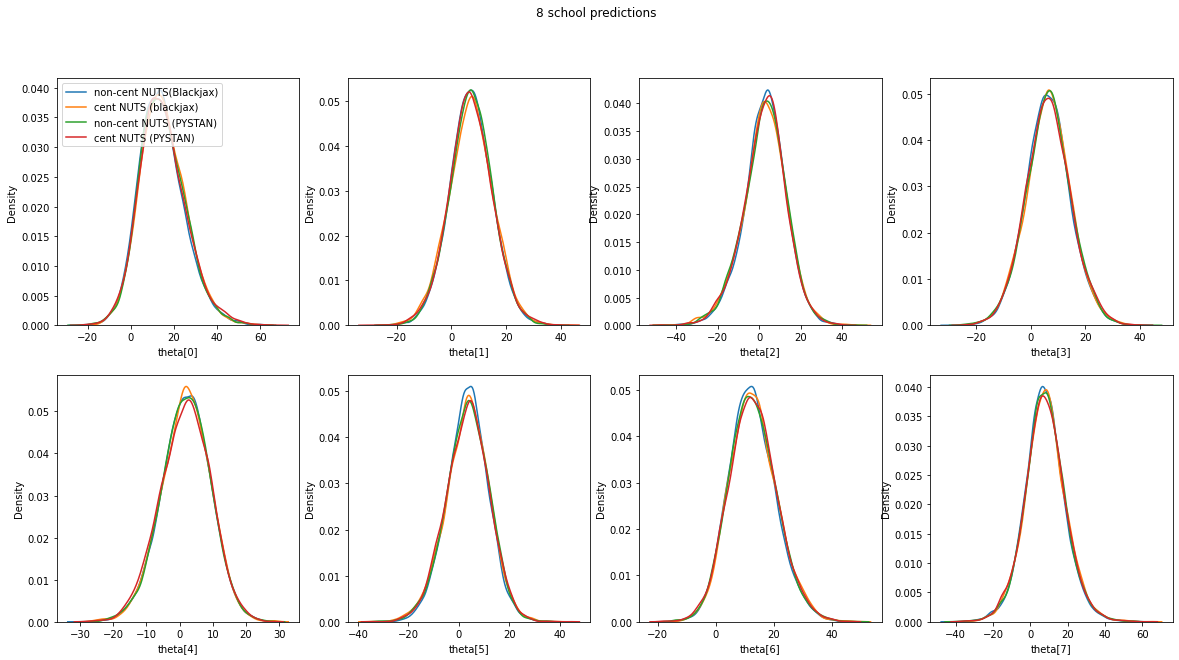

In [7]:

fig,ax = plt.subplots(2,4,figsize=(20,10))
i=0
sns.kdeplot(black_non_cent['theta['+str(i)+']'],label=f"non-cent NUTS(Blackjax)" ,ax=ax[int(i/4)][i%4])
sns.kdeplot(black_cent['theta['+str(i)+']'],label=f"cent NUTS (blackjax)" ,ax=ax[int(i/4)][i%4])
sns.kdeplot(pystan_non_cent['theta['+str(i+1)+']'],label=f"non-cent NUTS (PYSTAN)" ,ax=ax[int(i/4)][i%4])
sns.kdeplot(pystan_cent['theta['+str(i+1)+']'],label=f"cent NUTS (PYSTAN)" ,ax=ax[int(i/4)][i%4])
ax[int(i/4)][i%4].legend(loc=2)


for i in range(1,8):
    sns.kdeplot(black_non_cent['theta['+str(i)+']'],label=f"non-cent NUTS(Blackjax)" ,ax=ax[int(i/4)][i%4])
    sns.kdeplot(black_cent['theta['+str(i)+']'],label=f"cent NUTS (blackjax)" ,ax=ax[int(i/4)][i%4])
    sns.kdeplot(pystan_non_cent['theta['+str(i+1)+']'],label=f"non-cent NUTS (STAN)" ,ax=ax[int(i/4)][i%4])
    sns.kdeplot(pystan_cent['theta['+str(i+1)+']'],label=f"cent NUTS ()" ,ax=ax[int(i/4)][i%4])
plt.suptitle("8 school predictions")
plt.plot()

In [4]:

fig = make_subplots(rows=3, cols=3)

fig.add_trace(
    ff.create_distplot(),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=[20, 30, 40], y=[50, 60, 70],mode='lines'),
    row=1, col=2
)

fig.update_layout(height=600, width=800, title_text="8 school results")
fig.show()

In [ ]:
fig,ax = plt.subplots(3,3,figsize=(16,16))

for i in range(8):
    sns.kdeplot(trace_non_cent_df['theta['+str(i)+']'],label=f"non centered NUTS(Blackjax)" ,ax=ax[int(i/3)][i%3])
    sns.kdeplot(trace_cent_df['theta['+str(i)+']'],label=f"centered NUTS (blackjax)" ,ax=ax[int(i/3)][i%3])

    ax[int(i/3)][i%3].legend(loc=2)
